9-1 순차 데이터와 순차 신경망을 배웁니다

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [ ]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [ ]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [ ]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [ ]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [ ]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [ ]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [ ]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]


In [ ]:
from tensorflow.keras.preprocessing import sequence

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [ ]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [ ]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [ ]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [ ]:
print(x_train_onehot.nbytes)

800000000


In [ ]:
import tensorflow as tf

class RecurrentNetwork:
  def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells
    self.batch_size = batch_size
    self.w1h = None
    self.w1x = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.h = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate

  def forpass(self, x):
    self.h = [np.zeros((x.shape[0], self.n_cells))]
    seq = np.swapaxes(x, 0, 1)
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
      h = np.tanh(z1)
      self.h.append(h)
      z2 = np.dot(h, self.w2) + self.b2
    return z2

  def backprop(self, x, err):
    m = len(x)

    w2_grad = np.dot(self.h[-1].T, err) / m 
    b2_grad = np.sum(err) / m
    seq = np.swapaxes(x, 0 ,1)

    w1h_grad = w1x_grad = b1_grad = 0
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis=0)
      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    a = 1/ (1 + np.exp(-z))
    return a

  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()
    self.b1 = np.zeros(self.n_cells)
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1])

    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        a = self.training(x_batch, y_batch)

        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      self.update_val_loss(x_val, y_val)


  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]

  def training(self, x, y):
    m = len(x)
    z = self.forpass(x)
    a = self.sigmoid(z)
    err = - (y - a)

    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)

    self.w1h -= self.lr * w1h_grad
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a

  def predict(self, x):
    z = self.forpass(x)
    return z > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.sigmoid(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append(val_loss)

In [ ]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

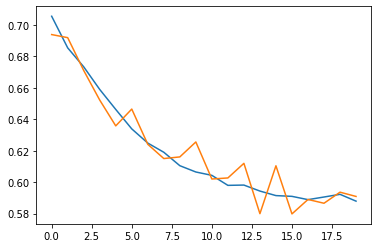

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [ ]:
rn.score(x_val_onehot, y_val)

0.6822

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 0.7044 - accuracy: 0.4996 - val_loss: 0.6978 - val_accuracy: 0.5054
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 0.6953 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.5160
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6895 - accuracy: 0.5328 - val_loss: 0.6822 - val_accuracy: 0.5640
Epoch 4/20
625/625 [==============================] - 11s 18ms/step - loss: 0.6765 - accuracy: 0.5704 - val_loss: 0.6616 - val_accuracy: 0.6046
Epoch 5/20
625/625 [==============================] - 11s 18ms/step - loss: 0.6565 - accuracy: 0.6084 - val_loss: 0.6380 - val_accuracy: 0.6382
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 0.6411 - accuracy: 0.6337 - val_loss: 0.6175 - val_accuracy: 0.6644
Epoch 7/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6195 - accuracy: 0.6599 - val_loss: 0.6410 - val_accuracy:

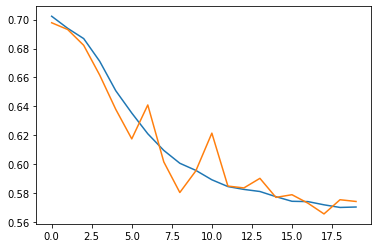

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

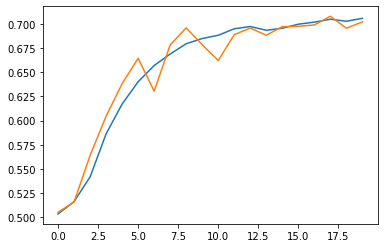

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

In [ ]:
print(accuracy)

0.7020000219345093
